<a href="https://colab.research.google.com/github/patilmanishj21/pyspark-learning/blob/main/Apache_PySpark_by_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apache PySpark by Example

**[June 2023 update]**

I've consolidated all the notebooks for this course into a single notebook. (The course videos will still show individual notebooks)


## Introduction to Google Colab

### Jupyter notebook basics

#### Code cells

#### Text cells

### Access to the shell

## Install Spark

- Google colab recently made some changes which breaks the Spark installation.
- Please use the code below where we install from the pyspark package instead

In [1]:
!pip install pyspark==3.4.0

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

## (02-02) Download Chicago's Reported Crime Data

### Downloading and preprocessing Chicago's Reported Crime Data

In [3]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
!ls -l

--2025-08-30 08:33:25--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

essType=DOWNLOAD        [            <=>     ]  13.40M  2.72MB/s               ^C
total 13812
-rw-r--r-- 1 root root 14136459 Aug 30 08:33 'rows.csv?accessType=DOWNLOAD'
drwxr-xr-x 1 root root     4096 Aug 28 13:43  sample_data


In [4]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv
!ls -l

total 13812
-rw-r--r-- 1 root root 14136459 Aug 30 08:33 reported-crimes.csv
drwxr-xr-x 1 root root     4096 Aug 28 13:43 sample_data


In [5]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11227634|   JB147599|2017-08-26 10:00:00| 001XX W RANDOLPH ST|0281|CRIM SEXUAL ASSAULT|      NON-AGGRAVATED|         HOTEL/MOTEL|

## (03-03) Schemas

In [9]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [91]:
from pyspark.sql.types import StringType,StructField,TimestampType,BooleanType,DoubleType,IntegerType, StructType,TimestampType,DateType

In [10]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [100]:
labels = [
    ('ID', StringType()),
    ('Case Number', StringType()),
    ('Date', StringType()),
    ('Block', StringType()),
    ('IUCR', StringType()),
    ('Primary Type', StringType()),
    ('Description', StringType()),
    ('Location Description', StringType()),
    ('Arrest', StringType()),
    ('Domestic', StringType()),
    ('Beat', StringType()),
    ('District', StringType()),
    ('Ward', StringType()),
    ('Community Area', StringType()),
    ('FBI Code', StringType()),
    ('X Coordinate', StringType()),
    ('Y Coordinate', StringType()),
    ('Year', StringType()),
    ('Updated On', StringType()),
    ('Latitude', StringType()),
    ('Longitude', StringType()),
    ('Location', StringType())
]

In [101]:
schema=StructType([StructField(x[0],x[1],True) for x in labels])
schema

StructType([StructField('ID', StringType(), True), StructField('Case Number', StringType(), True), StructField('Date', StringType(), True), StructField('Block', StringType(), True), StructField('IUCR', StringType(), True), StructField('Primary Type', StringType(), True), StructField('Description', StringType(), True), StructField('Location Description', StringType(), True), StructField('Arrest', StringType(), True), StructField('Domestic', StringType(), True), StructField('Beat', StringType(), True), StructField('District', StringType(), True), StructField('Ward', StringType(), True), StructField('Community Area', StringType(), True), StructField('FBI Code', StringType(), True), StructField('X Coordinate', StringType(), True), StructField('Y Coordinate', StringType(), True), StructField('Year', StringType(), True), StructField('Updated On', StringType(), True), StructField('Latitude', StringType(), True), StructField('Longitude', StringType(), True), StructField('Location', StringType(

In [102]:
rc=spark.read.csv('reported-crimes.csv',schema=schema,header=True)
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [104]:
from pyspark.sql.functions import to_timestamp

rc = rc.withColumn("Date", to_timestamp("Date", "MM/dd/yyyy hh:mm:ss a"))


In [105]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|13311263|   JG503434|2022-07-29 03:39:00|     023XX S TROY ST|1582|OFFENSE INVOLVING...|   CHILD PORNOGRAPHY|           RESIDE

## (03-04) Working with columns

**Display only the first 5 rows of the column name IUCR**

In [49]:
rc.select('IUCR').show(5)

+----+
|IUCR|
+----+
|1582|
|2017|
|0326|
|0281|
|1320|
+----+
only showing top 5 rows



In [50]:
rc.select(rc.IUCR).show(5)

+----+
|IUCR|
+----+
|1582|
|2017|
|0326|
|0281|
|1320|
+----+
only showing top 5 rows



In [51]:
rc.select(col('IUCR')).show(5)

+----+
|IUCR|
+----+
|1582|
|2017|
|0326|
|0281|
|1320|
+----+
only showing top 5 rows



  **Display only the first 4 rows of the column names Case Number, Date and Arrest**

In [52]:
rc.select('Case Number','Date','Arrest').show(4)

+-----------+----+------+
|Case Number|Date|Arrest|
+-----------+----+------+
|   JG503434|null|  true|
|   JG103252|null|  true|
|   JD327000|null|  true|
|   JB147599|null| false|
+-----------+----+------+
only showing top 4 rows



**Add a column with name One, with entries all 1s**

In [25]:
from pyspark.sql.functions import lit

In [53]:
rc.withColumn('One',lit(1)).show(5)

+--------+-----------+----+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|One|
+--------+-----------+----+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|13311263|   JG503434|null|     023XX S TROY ST|1582|OFFENSE INVOLVING...|   CHILD PORNOGRAPHY|           RESIDENCE|  true|   false|1033|     010|  25|         

**Remove the column IUCR**

In [27]:
rc.drop('IUCR').show(5)

+--------+-----------+----+--------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+------------+--------------------+
|      ID|Case Number|Date|               Block|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|   Longitude|            Location|
+--------+-----------+----+--------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+------------+--------------------+
|      ID|Case Number|null|               Block|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coord

## (03-05) Working with rows

**Add the reported crimes for an additional day, 12-Nov-2018, to our dataset.**

In [54]:
onedate=spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))

In [55]:
onedate.count()

1

In [56]:
rc.union(onedate).orderBy('Date',ascending=False).show(5)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|13358766|   JH140578|2018-11-12 00:00:00|     008XX E 63RD ST|1153|  DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           APARTM

In [57]:
rc.select('Date').distinct().show(5)

+----+
|Date|
+----+
|null|
+----+



**What are the top 10 number of reported crimes by Primary type, in descending order of occurence?**

In [58]:
rc.groupBy('Primary Type').count().show(5)

+--------------------+-----+
|        Primary Type|count|
+--------------------+-----+
|OFFENSE INVOLVING...|  663|
|CRIMINAL SEXUAL A...|  565|
|            STALKING|  145|
|PUBLIC PEACE VIOL...|  193|
|           OBSCENITY|   13|
+--------------------+-----+
only showing top 5 rows



In [59]:
rc.groupBy('Primary Type').count().orderBy('count',ascending=False).show(10)

+-------------------+-----+
|       Primary Type|count|
+-------------------+-----+
|              THEFT|12896|
|            BATTERY| 9363|
|    CRIMINAL DAMAGE| 6174|
|MOTOR VEHICLE THEFT| 5933|
| DECEPTIVE PRACTICE| 5030|
|            ASSAULT| 4843|
|      OTHER OFFENSE| 3377|
|            ROBBERY| 3092|
|           BURGLARY| 1761|
|  WEAPONS VIOLATION| 1671|
+-------------------+-----+
only showing top 10 rows



## (03-06) Challenge

**What percentage of reported crimes resulted in an arrest?**

In [60]:
rc.show(5)

+--------+-----------+----+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|13311263|   JG503434|null|     023XX S TROY ST|1582|OFFENSE INVOLVING...|   CHILD PORNOGRAPHY|           RESIDENCE|  true|   false|1033|     010|  25|            30|      

In [61]:
rc.select('Arrest').distinct().show()

+------+
|Arrest|
+------+
| false|
|  true|
|  null|
+------+



In [62]:
rc.groupBy('Arrest').count().show()

+------+-----+
|Arrest|count|
+------+-----+
| false|51846|
|  true| 7332|
|  null|    1|
+------+-----+



In [65]:
rc.filter(col('Arrest')=='true').count()/rc.select('Arrest').count()

0.1238953006978827

  **What are the top 3 locations for reported crimes?**

In [66]:
rc.groupBy('Location Description').count().orderBy('count',ascending=False).show(3)

+--------------------+-----+
|Location Description|count|
+--------------------+-----+
|              STREET|16544|
|           APARTMENT|10859|
|           RESIDENCE| 7573|
+--------------------+-----+
only showing top 3 rows



## (04-01) Built-in functions

In [71]:
from pyspark.sql.functions import lower,upper,substring

In [78]:
rc.select(lower('Primary Type'),upper(col('Primary Type')),substring(col('Primary Type'),1,4)).show(5)

+--------------------+--------------------+-----------------------------+
| lower(Primary Type)| upper(Primary Type)|substring(Primary Type, 1, 4)|
+--------------------+--------------------+-----------------------------+
|offense involving...|OFFENSE INVOLVING...|                         OFFE|
|           narcotics|           NARCOTICS|                         NARC|
|             robbery|             ROBBERY|                         ROBB|
| crim sexual assault| CRIM SEXUAL ASSAULT|                         CRIM|
|     criminal damage|     CRIMINAL DAMAGE|                         CRIM|
+--------------------+--------------------+-----------------------------+
only showing top 5 rows



### String functions

**Display the Primary Type column in lower and upper characters, and the first 4 characters of the column**

### Numeric functions


**Show the oldest date and the most recent date**

In [106]:
from pyspark.sql.functions import col, min, max

rc.select(
    min(col("Date")).alias("min_date"),
    max(col("Date")).alias("max_date")
).show()

+-------------------+-------------------+
|           min_date|           max_date|
+-------------------+-------------------+
|2001-01-01 00:00:00|2025-06-10 21:00:00|
+-------------------+-------------------+



### Date

**What is 3 days earlier that the oldest date and 3 days later than the most recent date?**

In [107]:
from pyspark.sql.functions import date_add, date_sub

In [108]:
rc.select(
    date_sub(min(col("Date")), 3).alias("3 days earlier"),
    date_add(max(col("Date")), 3).alias("3 days later")
).show()

+--------------+------------+
|3 days earlier|3 days later|
+--------------+------------+
|    2000-12-29|  2025-06-13|
+--------------+------------+



## (04-02) Working with dates

In [112]:
from pyspark.sql.functions import to_date, to_timestamp, lit

In [109]:
df=spark.createDataFrame([('2019-12-25 13:30:00',)],['Christmas'])
df.show()

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



  **2019-12-25 13:30:00**

In [117]:
df.select(to_date(col('Christmas'),'yyyy-MM-dd HH:mm:ss')).show()

+---------------------------------------+
|to_date(Christmas, yyyy-MM-dd HH:mm:ss)|
+---------------------------------------+
|                             2019-12-25|
+---------------------------------------+



**25/Dec/2019 13:30:00**

In [120]:
df=spark.createDataFrame([('2019/DEC/25 13:30:00',)],['Christmas'])
df.select(to_date(col('Christmas'),'yyyy/MMM/dd HH:mm:ss')).show()


+----------------------------------------+
|to_date(Christmas, yyyy/MMM/dd HH:mm:ss)|
+----------------------------------------+
|                              2019-12-25|
+----------------------------------------+



**12/25/2019 01:30:00 PM**

In [127]:
from pyspark.sql.functions import to_date, to_timestamp, col

df = spark.createDataFrame([('12/25/2019 01:30:00 PM',)], ['Christmas'])

# if you only want the calendar date
df.select(to_date(col('Christmas'), 'MM/dd/yyyy hh:mm:ss a')).show()

# if you want full timestamp (date + time)
df.select(to_timestamp(col('Christmas'), 'MM/dd/yyyy hh:mm:ss a')).show()

+-----------------------------------------+
|to_date(Christmas, MM/dd/yyyy hh:mm:ss a)|
+-----------------------------------------+
|                               2019-12-25|
+-----------------------------------------+

+----------------------------------------------+
|to_timestamp(Christmas, MM/dd/yyyy hh:mm:ss a)|
+----------------------------------------------+
|                           2019-12-25 13:30:00|
+----------------------------------------------+



## (04-03) Joins

**Download police station data**

In [146]:
file_path = "/content/police-station.csv"

In [149]:
ps=spark.read.csv(file_path,header=True)
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

**The reported crimes dataset has only the district number. Add the district name by joining with the police station dataset**

In [150]:
rc.cache()
rc.count()

59179

In [151]:
ps.select('DISTRICT').distinct().show(30)

+------------+
|    DISTRICT|
+------------+
|           7|
|          15|
|          11|
|           3|
|           8|
|          22|
|          16|
|           5|
|          18|
|          17|
|           6|
|          19|
|          25|
| ","Chicago"|
|Headquarters|
|          24|
|           9|
|           1|
|          20|
|          10|
|           4|
|          12|
|          14|
|           2|
+------------+



In [152]:
rc.select('District').distinct().show(30)

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     002|
|      16|
|    null|
+--------+



In [154]:
from pyspark.sql.functions import lpad

In [155]:
ps.select(lpad(col('DISTRICT'),3,'0')).show()

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 ","|
+--------------------+
only showing top 20 rows



In [156]:
ps=ps.withColumn('Format_district',lpad(col('DISTRICT'),3,'0'))
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 117

In [158]:
rc.join(ps, rc.District==ps.Format_district,'left_outer').show(5)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+-------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|DISTRICT|DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_dist

In [159]:
rc.join(ps, rc.District==ps.Format_district,'left_outer').drop('ADDRESS','PHONE','WEBSITE','FAX','UPDATE_ON','LAT','LON').show(5)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+-------------+-------+-----+-----+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|DISTRICT|DISTRICT NAME|   CITY|STATE|  ZIP|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------

## (04-05) Challenge questions

**What is the most frequently reported non-criminal activity?**

In [160]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|13311263|   JG503434|2022-07-29 03:39:00|     023XX S TROY ST|1582|OFFENSE INVOLVING...|   CHILD PORNOGRAPHY|           RESIDE

In [166]:
rc.select(col('Primary Type')).distinct().orderBy(col('Primary Type')).show(31,truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|null                             |
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN       |
|OTHER NARCOTIC VIOLATION         |
|OTHER OFFENSE                    |
|PROSTITUTION               

**Using a bar chart, plot which day of the week has the most number of reported crime.**

In [168]:
from pyspark.sql.functions import dayofweek

In [169]:
rc.select(col('Date'),dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2022-07-29 03:39:00|              6|
|2023-01-03 16:44:00|              3|
|2020-08-10 09:45:00|              2|
|2017-08-26 10:00:00|              7|
|2023-09-06 17:00:00|              4|
+-------------------+---------------+
only showing top 5 rows



In [170]:
from pyspark.sql.functions import date_format

In [171]:
rc.select(col('Date'),date_format(col('Date'),'EEEE')).show(5)

+-------------------+-----------------------+
|               Date|date_format(Date, EEEE)|
+-------------------+-----------------------+
|2022-07-29 03:39:00|                 Friday|
|2023-01-03 16:44:00|                Tuesday|
|2020-08-10 09:45:00|                 Monday|
|2017-08-26 10:00:00|               Saturday|
|2023-09-06 17:00:00|              Wednesday|
+-------------------+-----------------------+
only showing top 5 rows



In [172]:
rc.groupBy(date_format(col('Date'),'EEEE').alias('day of week')).count().orderBy('count',ascending=False).show()

+-----------+-----+
|day of week|count|
+-----------+-----+
|     Friday| 8761|
|   Saturday| 8607|
|  Wednesday| 8549|
|     Sunday| 8458|
|   Thursday| 8375|
|    Tuesday| 8240|
|     Monday| 8188|
|       null|    1|
+-----------+-----+



In [173]:
rc.groupBy(date_format(col('Date'),'EEEE').alias('day of week')).count().collect()

[Row(day of week='Wednesday', count=8549),
 Row(day of week='Tuesday', count=8240),
 Row(day of week='Friday', count=8761),
 Row(day of week='Thursday', count=8375),
 Row(day of week='Saturday', count=8607),
 Row(day of week='Monday', count=8188),
 Row(day of week='Sunday', count=8458),
 Row(day of week=None, count=1)]

In [176]:
dow=[x[0] for x in rc.groupBy(date_format(col('Date'),'EEEE').alias('day of week')).count().collect()]
dow

['Wednesday',
 'Tuesday',
 'Friday',
 'Thursday',
 'Saturday',
 'Monday',
 'Sunday',
 None]

In [178]:
count=[x[1] for x in rc.groupBy(date_format(col('Date'),'EEEE').alias('day of week')).count().collect()]
count

[8549, 8240, 8761, 8375, 8607, 8188, 8458, 1]

In [189]:
import pandas as pd
import matplotlib.pyplot as plt

In [186]:
cp= pd.DataFrame({'dow':dow,'count':count})
cp

,dow,count
0,Wednesday,8549
1,Tuesday,8240
2,Friday,8761
3,Thursday,8375
4,Saturday,8607
5,Monday,8188
6,Sunday,8458
7,None,1


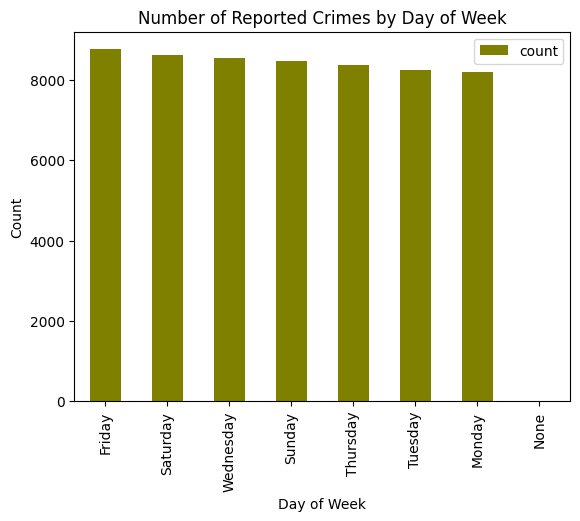

In [191]:
cp.sort_values('count',ascending=False).plot(kind='bar',color='olive',x='dow',y='count')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Number of Reported Crimes by Day of Week')
plt.show()


## (05-01) RDDs setup

In [194]:
from pyspark import SparkContext
sc=SparkContext.getOrCreate()

In [235]:
psrdd=sc.textFile('police-station.csv')

In [236]:
psrdd.first()

'"DISTRICT","DISTRICT NAME","ADDRESS","CITY","STATE","ZIP","WEBSITE","PHONE","FAX","TTY","X COORDINATE","Y COORDINATE","LATITUDE","LONGITUDE","LOCATION"'

In [237]:
ps_header=psrdd.first()
ps_rest=psrdd.filter(lambda line:line!=ps_header)

In [238]:
ps_rest.first()

'"Headquarters","Headquarters","3510 S Michigan Ave","Chicago","IL","60653","http://home.chicagopolice.org",,,,"1177731.401","1881697.404","41.83070169","-87.62339535","(41.8307016873, -87.6233953459)"'

In [239]:
ps_rest.map(lambda x:x.split(',')).collect()

[['"Headquarters"',
  '"Headquarters"',
  '"3510 S Michigan Ave"',
  '"Chicago"',
  '"IL"',
  '"60653"',
  '"http://home.chicagopolice.org"',
  '',
  '',
  '',
  '"1177731.401"',
  '"1881697.404"',
  '"41.83070169"',
  '"-87.62339535"',
  '"(41.8307016873',
  ' -87.6233953459)"'],
 ['"18"',
  '"Near North"',
  '"1160 N Larrabee St"',
  '"Chicago"',
  '"IL"',
  '"60610"',
  '"http://home.chicagopolice.org/community/districts/18th-district-near-north/"',
  '"312-742-5870"',
  '"312-742-5771"',
  '"312-742-5773"',
  '"1172080.029"',
  '"1908086.527"',
  '"41.90324165"',
  '"-87.64335214"',
  '"(41.9032416531',
  ' -87.6433521393)"'],
 ['"19"',
  '"Town Hall"',
  '"850 W Addison St"',
  '"Chicago"',
  '"IL"',
  '"60613"',
  '"http://home.chicagopolice.org/community/districts/19th-district-town-hall/"',
  '"312-744-8320"',
  '"312-744-4481"',
  '"312-744-8011"',
  '"1169730.744"',
  '"1924160.317"',
  '"41.94740046"',
  '"-87.65151202"',
  '"(41.9474004564',
  ' -87.651512018)"'],
 ['"20"',

**How many police stations are there?**

In [240]:
ps_rest.map(lambda x:x.split(',')).count()

24

**Display the District ID, District name, Address and Zip for the police station with District ID 7**



In [242]:
(ps_rest.filter(lambda line:line.split(',')[0] == '"7"')
.map(lambda line:(line.split(',')[0],
                  line.split(',')[1],
                  line.split(',')[2],
                  line.split(',')[5])).collect())

[('"7"', '"Englewood"', '"1438 W 63rd St"', '"60636"')]

**Police stations 10 and 11 are geographically close to each other. Display the District ID, District name, address and zip code**

In [249]:
(
    ps_rest
    .map(lambda line: [field.strip('"') for field in line.split(',')])
    .filter(lambda fields: fields[0] in ['10', '11'])
    .map(lambda fields: (fields[1], fields[1]))
    .collect()
)

[('Ogden', 'Ogden'), ('Harrison', 'Harrison')]